# __Forecasting the VIX with Monte Carlo Simulation__

In [1]:
# Importing Packages
import yfinance as yf
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm

                 Open       High        Low      Close  Volume  Dividends  \
Date                                                                        
2022-06-15  32.389999  32.770000  27.760000  29.620001       0          0   
2022-06-16  30.350000  34.820000  30.350000  32.950001       0          0   
2022-06-17  32.840000  33.310001  30.469999  31.129999       0          0   
2022-06-21  30.629999  30.650000  29.330000  30.190001       0          0   
2022-06-22  31.450001  31.570000  28.780001  28.950001       0          0   

            Stock Splits  
Date                      
2022-06-15             0  
2022-06-16             0  
2022-06-17             0  
2022-06-21             0  
2022-06-22             0  
                Close
Date                 
2022-06-15  29.620001
2022-06-16  32.950001
2022-06-17  31.129999
2022-06-21  30.190001
2022-06-22  28.950001
2022-06-23  29.049999
2022-06-24  27.230000
2022-06-27  26.950001
2022-06-28  28.360001
2022-06-29  28.160000
2022-06

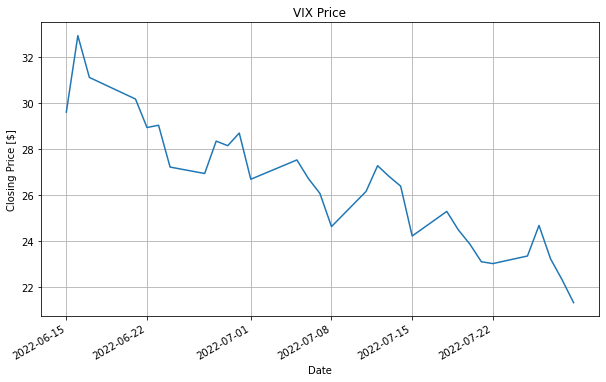

In [2]:
# Defining the Ticker
ticker = yf.Ticker('^VIX')   #^VIX is the VIX ticker symbol via Yahoo Finance

# Obtaining Historical Market Data
start_date = '2022-06-15'
end_date = '2022-08-01'
hist = ticker.history(start=start_date, end=end_date)
print(hist.head())

# Pulling Closing Price Data
hist = hist[['Close']]
print(hist)

# Plotting Price Data
hist['Close'].plot(title="VIX Price", ylabel=
                   "Closing Price [$]", figsize=[10, 6])
plt.grid()

In [3]:
# Create Day Count, Price, and Change Lists
days = [i for i in range(1, len(hist['Close'])+1)]
price_orig = hist['Close'].tolist()
change = hist['Close'].pct_change().tolist()
change = change[1:]  # Removing the first term since it is NaN

# Statistics for Use in Model
mean = np.mean(change)
std_dev = np.std(change)
print('\nMean percent change: ' + str(round(mean*100, 2)) + '%')
print('Standard Deviation of percent change: ' +   
      str(round(std_dev*100, 2)) + '%')


Mean percent change: -0.99%
Standard Deviation of percent change: 4.51%


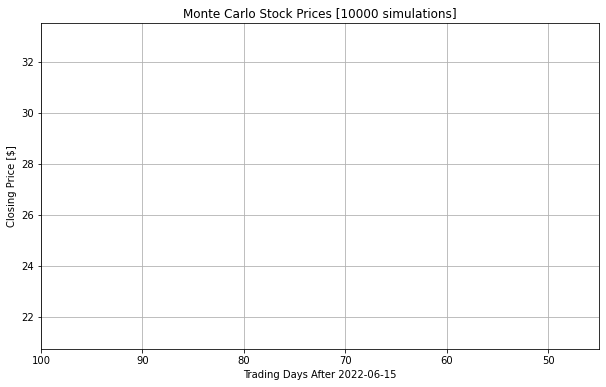

In [4]:
# Simulation Number and Prediction Period
simulations = 10000 # Change for more results
days_to_sim = 14 # Forecasting 14 days from August 1st, 2022 

# Initializing Figure for Simulation
fig = plt.figure(figsize=[10, 6])
plt.plot(days, price_orig)
plt.title("Monte Carlo Stock Prices [" + str(simulations) + 
          " simulations]")
plt.xlabel("Trading Days After " + start_date)
plt.ylabel("Closing Price [$]")
plt.xlim([100, len(days)+days_to_sim])
plt.grid()

# Initializing Lists for Analysis
close_end = []
above_close = []

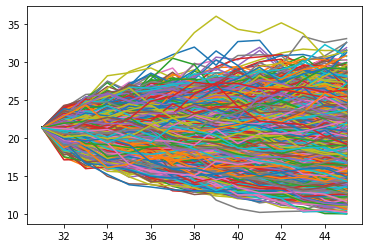

In [5]:
# For Loop for Number of Simulations Desired
for i in range(simulations):
    num_days = [days[-1]]
    close_price = [hist.iloc[-1, 0]]
    
    # For Loop for Number of Days to Predict
    for j in range(days_to_sim):
        num_days.append(num_days[-1]+1)
        perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
        close_price.append(close_price[-1]*(1+perc_change))

    if close_price[-1] > price_orig[-1]:
        above_close.append(1)
    else:
        above_close.append(0)

    close_end.append(close_price[-1])
    plt.plot(num_days, close_price)

In [6]:
# Average Closing Price and Probability of Increasing After 1 month
average_closing_price = sum(close_end)/simulations
average_perc_change = (average_closing_price-
                       price_orig[-1])/price_orig[-1]
probability_of_increase = sum(above_close)/simulations
print('\nPredicted closing price after ' + str(simulations) + 
      ' simulations: $' + str(round(average_closing_price, 2)))
print('Predicted percent increase after 6 months: ' + 
      str(round(average_perc_change*100, 2)) + '%')
print('Probability of stock price increasing after 1 month: ' + 
      str(round(probability_of_increase*100, 2)) + '%')

# Displaying the Monte Carlo Simulation Lines



Predicted closing price after 10000 simulations: $18.58
Predicted percent increase after 6 months: -12.9%
Probability of stock price increasing after 1 month: 19.22%


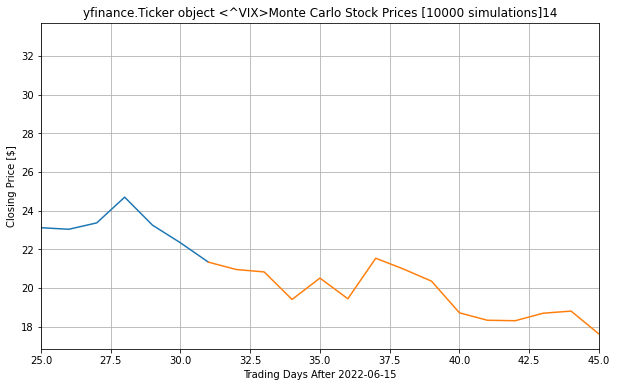

In [7]:
fig = plt.figure(figsize=[10, 6])
plt.plot(days, price_orig, num_days, close_price)
plt.title(str(ticker) + "Monte Carlo Stock Prices [" + str(simulations) + 
          " simulations]" +  str(days_to_sim))
plt.xlabel("Trading Days After " + start_date)
plt.ylabel("Closing Price [$]")
plt.xlim([25, len(days)+days_to_sim])
plt.grid()
